In [108]:
from keras.datasets import cifar10, mnist
from keras.utils import to_categorical
import tensorflow as tf  # now import the tensorflow module
tf.compat.v1.disable_eager_execution()
import matplotlib.pyplot as plt
import numpy as np

# Préparation des données :

In [125]:
#chargement des données
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#remodélisation des données 
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
y_train = y_train.reshape(60000,1)
y_test = y_test.reshape(10000,1)

#Création des données de validation
X_train, X_val = X_train[12000:,:], X_train[:12000,:]
y_train, y_val = y_train[12000:,:], y_train[:12000,:]

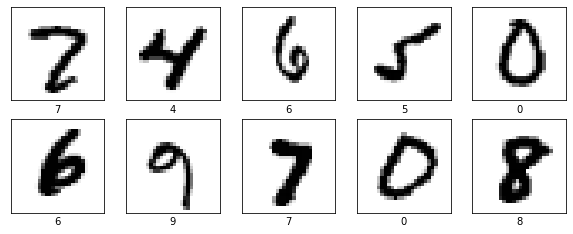

In [126]:
#visualisation des données
classes = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classes[y_train[i][0]])
plt.show()

# Construction du modèle : 

In [116]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

# Entraînement du modèle :

In [145]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

# Evaluation du modèle :

In [127]:
model.evaluate(X_test,  y_test, verbose=2)

[0.06376776602635498, 0.984]

# visualisation de quelques prédictions :

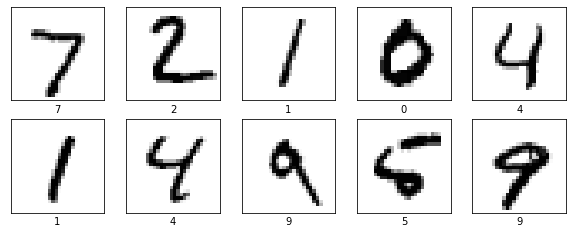

In [144]:
ynew = np.argmax(model.predict(X_test), axis=-1).reshape(10000,1)

plt.figure(figsize=(10,10))
for i in range(10):
    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(classes[ynew[i][0]])
plt.show()